#**Problem Statement**

AeroFit, a leading fitness equipment brand, offers a diverse range of treadmills tailored for different customer segments. However, with increasing competition and evolving customer preferences, it has become crucial for the company to better understand the characteristics of its existing customers. Specifically, the market research team seeks to identify how customer demographics and behavioral attributes (such as age, income, gender, fitness goals, etc.) vary across different treadmill products. By analyzing these differences, AeroFit aims to enhance its recommendation system and provide personalized product suggestions to new customers.

The challenge lies in systematically profiling customers for each treadmill product and uncovering patterns that influence purchase decisions. This requires applying descriptive analytics and probability-based analysis to generate meaningful insights that can drive targeted marketing and product positioning strategies

#**Objective**
1.   Customer Profiling: To create a detailed profile of customers for each AeroFit treadmill product based on demographic and behavioral characteristics.
2.   Descriptive Analytics: To summarize and visualize customer data using tables and charts that highlight patterns, distributions, and variations across treadmill types.
3.   Contingency Analysis: To construct two-way contingency tables for treadmill products against customer attributes (e.g., age group, income, gender) and compute marginal and conditional probabilities.
4.   Insight Generation: To interpret the probabilities and descriptive statistics to identify which customer segments are more likely to prefer each treadmill product.
5.   Business Impact:  

  *   To provide actionable insights that will help AeroFit in:
  *   Improving customer targeting and personalization.
  *   Designing effective marketing campaigns
  *   Enhancing product recommendation systems.
  *   Strengthening competitive advantage in the fitness equipment market

































#**Import required libraries**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#**Download required Dataset**


In [3]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749
To: /content/aerofit_treadmill.csv?1639992749
100% 7.28k/7.28k [00:00<00:00, 24.4MB/s]


#**Loading the data**

In [4]:
fit_df=pd.read_csv('aerofit_treadmill.csv')

In [5]:
fit_df.head(3)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66


# **Data Dictionary**

The dataset contains 180 observations with the following variables:

| Column     | Description                                                                 |
|------------|-----------------------------------------------------------------------------|
| Product    | Type of treadmill purchased (KP281, KP481, KP781).                          |
| Age        | Age of the customer (in years).                                             |
| Gender     | Gender of the customer (Male/Female).                                       |
| Education  | Education level (years of formal education).                                |
| MaritalStatus | Marital status of the customer (Single/Partnered).                       |
| Usage      | Average weekly usage of the treadmill (in times per week).                  |
| Fitness    | Self-rated fitness level of the customer (1 = lowest, 5 = highest).         |
| Income     | Annual income of the customer (in USD).                                     |
| Miles      | Average weekly miles expected to be run/walked on the treadmill.            |

---


#**Understand the Structure of the Dataset**

In [ ]:
fit_df.shape

(180, 9)

**Insights**:- My '**fit_df**' has 180 rows and 9 columns

In [ ]:
fit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


**Insights** :- My dataset '**fit_df**' has the valuues of string datatype and Integer datatype.

#**Basic Summary Statistics**

In [ ]:
fit_df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


**Insights**:- It gives the basic statistical summary based on different columns .


In [ ]:
fit_df.describe(include='object')   # for categorical variables

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


**Insights** :- It gives the basic calculations (count, frequency, count of unique_records and top most record of categorical columns)

In [ ]:
fit_df['Product'].value_counts() # distribution of treadmill products

,count
Product,
KP281,80
KP481,60
KP781,40


**Insights**:- It gives the frequency count of different treadmill products.

###Group descriptive stats per product

In [ ]:
fit_df.groupby('Product')[['Age','Income','Usage','Fitness','Miles']].mean()


,Age,Income,Usage,Fitness,Miles
Product,,,,,
KP281,28.55,46418.025,3.087500,2.9625,82.787500
KP481,28.90,48973.650,3.066667,2.9000,87.933333
KP781,29.10,75441.575,4.775000,4.6250,166.900000


**Insights** :-

*   KP281 - Younger, lower income, occasional users.
*   KP481 - Mid-income, moderate usage.
*   KP781 - Elder than other, High-income, frequent users, more finess-conscious.

#**Checking Data Quality**

In [ ]:
fit_df.isnull().sum()

,0
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0


**Insights**:- It shows that this dataset does not have any null values in it.

In [ ]:
fit_df.duplicated().sum()

np.int64(0)

**Insights**:- It shows that there are no duplicate entries in this dataset.

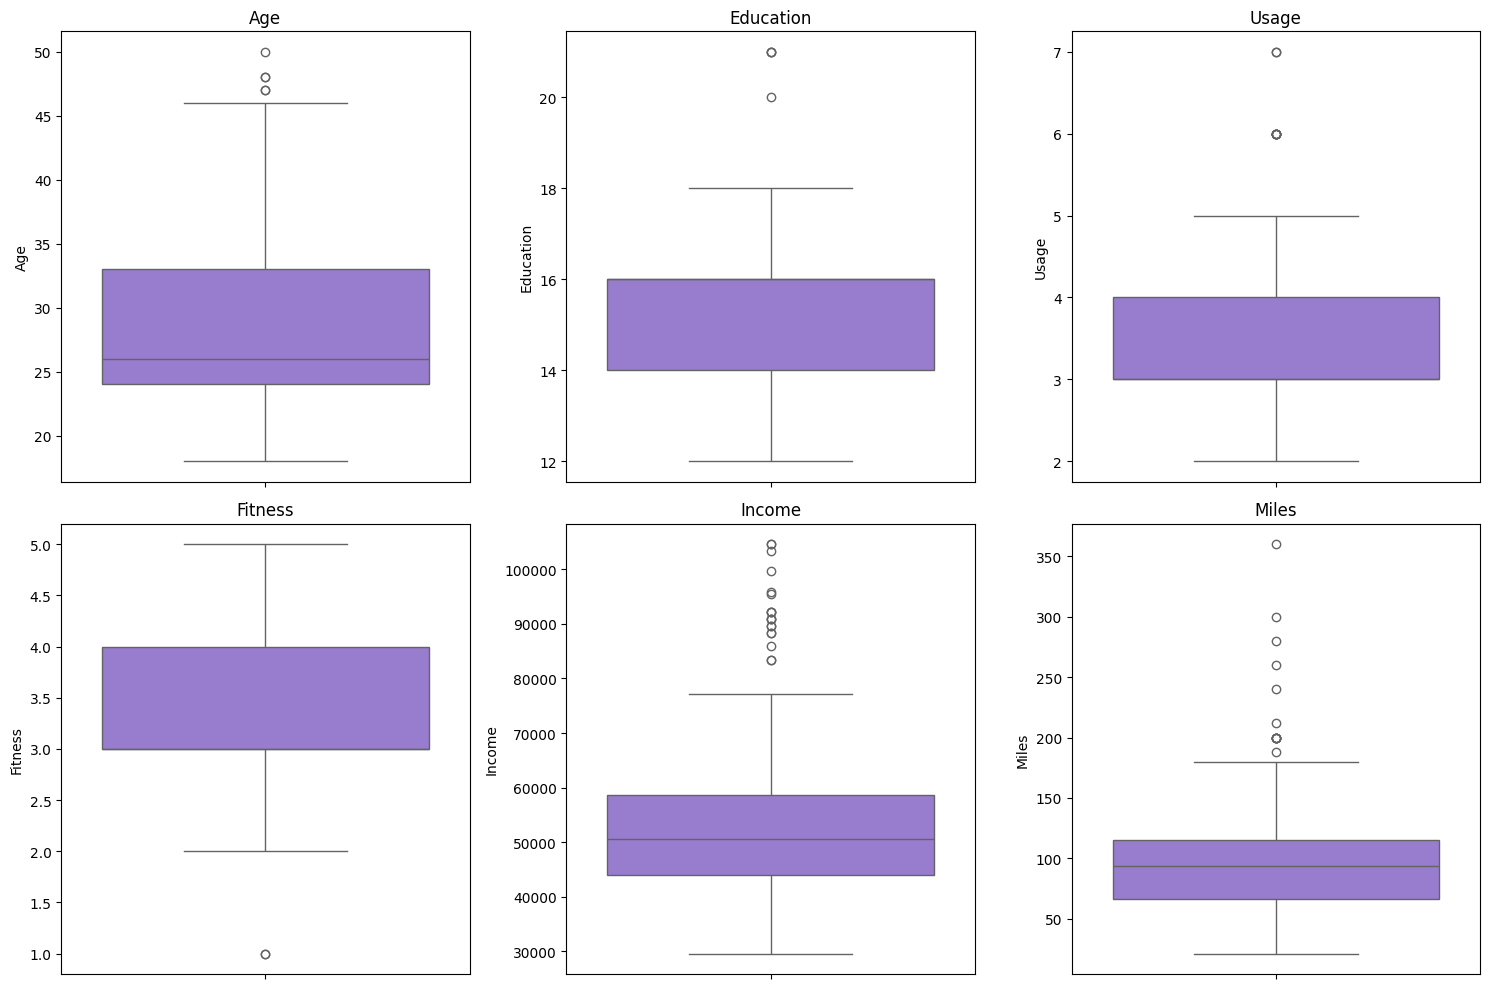

In [ ]:
num_cols = ["Age", "Education", "Usage", "Fitness", "Income", "Miles"]

plt.figure(figsize=(15, 10))

for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns grid
    sns.boxplot(y=fit_df[col], color="mediumpurple")
    plt.title(col)

plt.tight_layout()
plt.show()

**Insights** :-
The typical Aerofit customer is:
*   26 years old
*   College-educated (15–16 years)
*   Uses the product 3–4 times a week
*   Self-rates fitness as 3–4
*   Earns about 50,000
*   Covers ~90–100 miles weekly
*   There are notable outliers in income, age, and miles, suggesting a few heavy users or high-income customers.

#**Detect Outliers**

###By describe() method

In [ ]:
# Select numerical columns
num_cols = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']

# Get descriptive statistics
summary = fit_df[num_cols].describe().T  # Transpose for better view

# Calculate median separately
medians = fit_df[num_cols].median()

# Add median to the summary
summary['median'] = medians

# Calculate difference between mean and median
summary['mean-median'] = summary['mean'] - summary['median']

# Display the final summary table
summary


,count,mean,std,min,25%,50%,75%,max,median,mean-median
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0,26.0,2.788889
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0,16.0,-0.427778
Usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0,3.0,0.455556
Fitness,180.0,3.311111,0.958869,1.0,3.00,3.0,4.00,5.0,3.0,0.311111
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0,50596.5,3123.077778
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0,94.0,9.194444


**Insights**

*NOTE:-(Mean > Median → Right Skew → High Outliers)*
*   Income: Large positive difference (+3123) → strong right skew → high-income outliers present.
*   Miles: Difference of +9.19 → right skew → high-mileage outliers present.
*   Age: +2.79 → mild skew → some older age outliers.
*   Usage & Fitness: Small positive difference → few outliers.
*   Education: Slight negative difference → no major skew.



###By box-plot

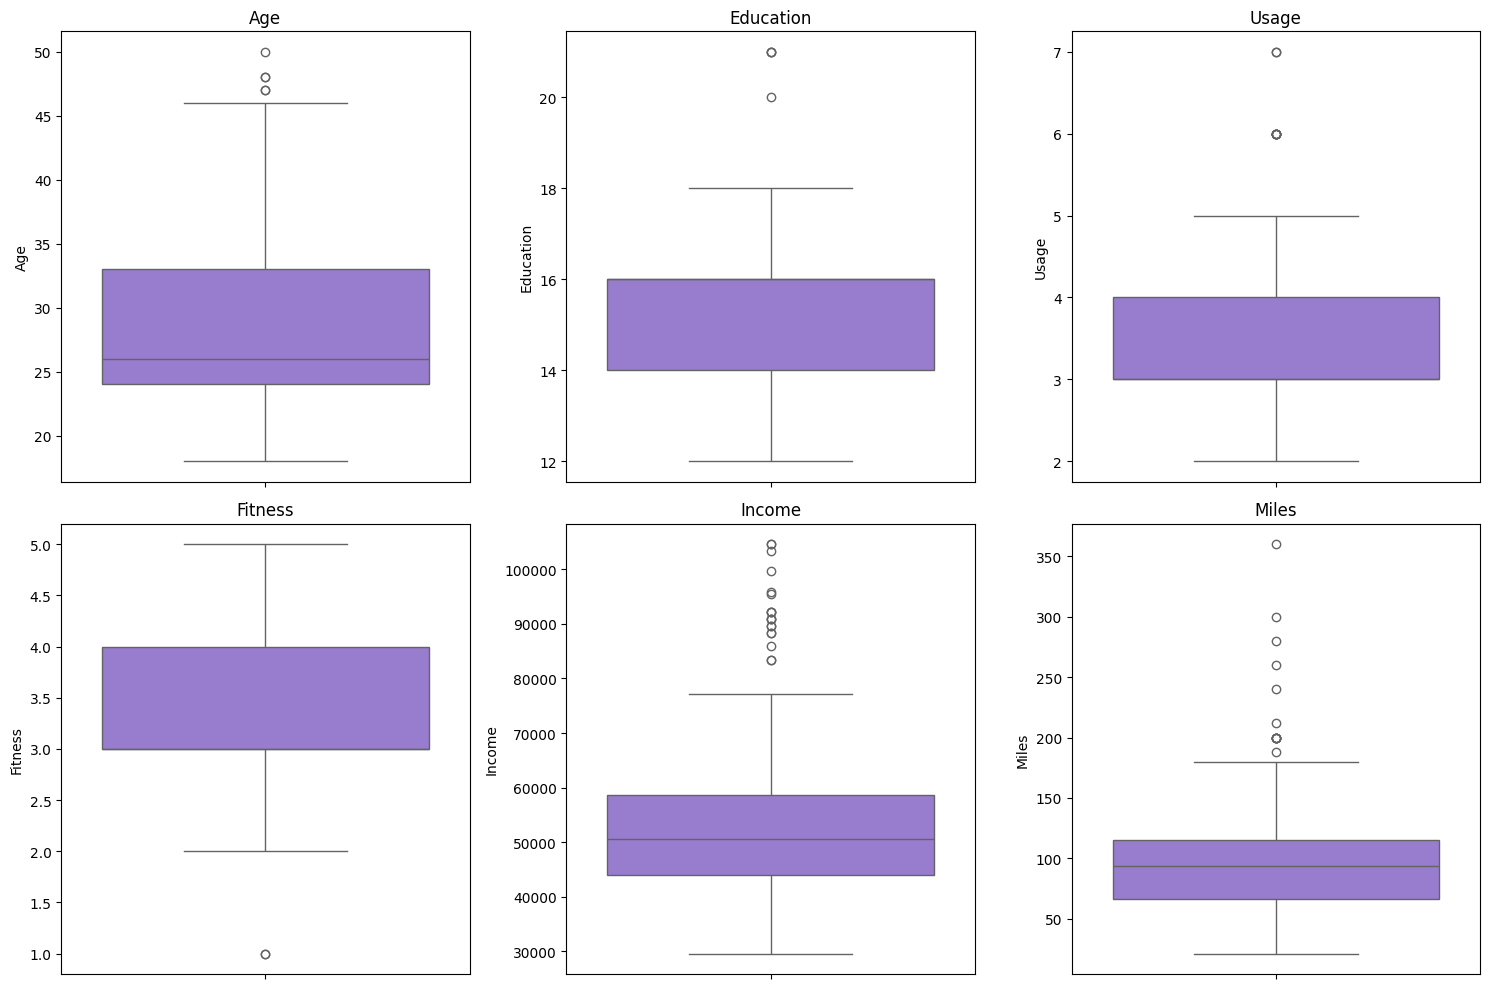

In [ ]:

plt.figure(figsize=(15, 10))

for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns grid
    sns.boxplot(y=fit_df[col], color="mediumpurple")
    plt.title(col)

plt.tight_layout()
plt.show()

**Insights**:-
*   Age: A few outliers above 45
*   Education: Outliers above ~18 years.
*   Usage: Outliers above 5 (up to 7).
*   Fitness: One outlier at 1 (very low).
*   Income: Several outliers above ~78,000 (up to ~105,000).
*   Miles: Many outliers above ~180 miles (up to 350+).













**Outlier Analysis**:-
From the boxplots of Age and Income, we observe the following:

*   Income shows a few high-income outliers (above ₹80,000 monthly). These represent affluent customers who may not behave like the majority.
*   Age distribution is fairly tight, but a few younger buyers (<20 years) and older buyers (>65 years) exist. These are rare cases and may correspond to niche customer segments.
*   Since these outliers are valid customer records (not data entry errors), we will retain them, as they may offer insights for premium or special-category product targeting.

#**Exploring Data Characteristics**

###Univariate Analysis

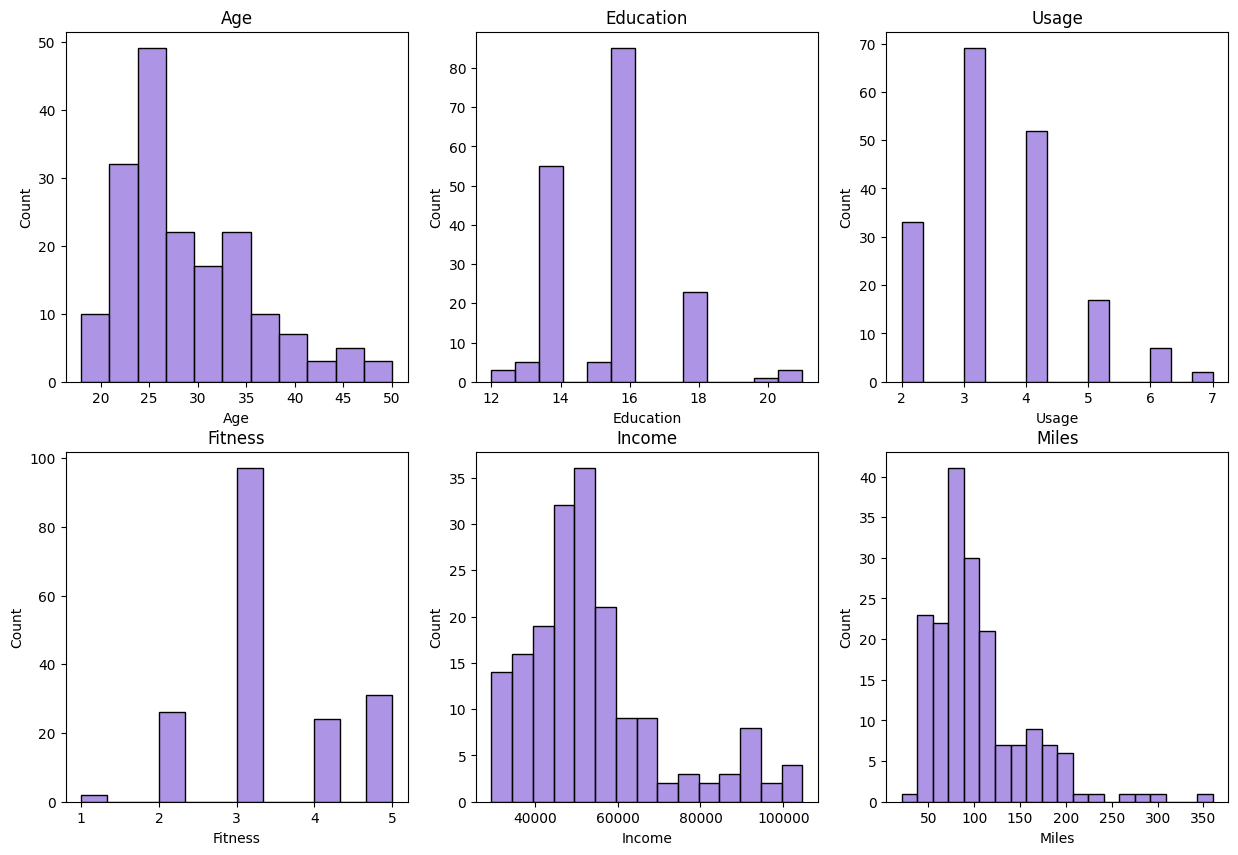

In [ ]:
#Analysis of int_type (numerical) columns.
num_cols = ["Age", "Education", "Usage", "Fitness", "Income", "Miles"]
plt.figure(figsize=(15, 10))

for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns grid
    sns.histplot(x=fit_df[col], color="mediumpurple")
    plt.title(col)

**Insights**:-
*  Demographic: Young (20s–30s), educated, middle-income individuals.
*  Behavior: Moderate users (3 times/week, ~100 miles/week), self-rated average fitness.

*  Market Implication:
    1.   Products and marketing should focus on young professionals & college graduates.
    2.   Fitness equipment should emphasize convenience for moderate users (not just hardcore athletes).


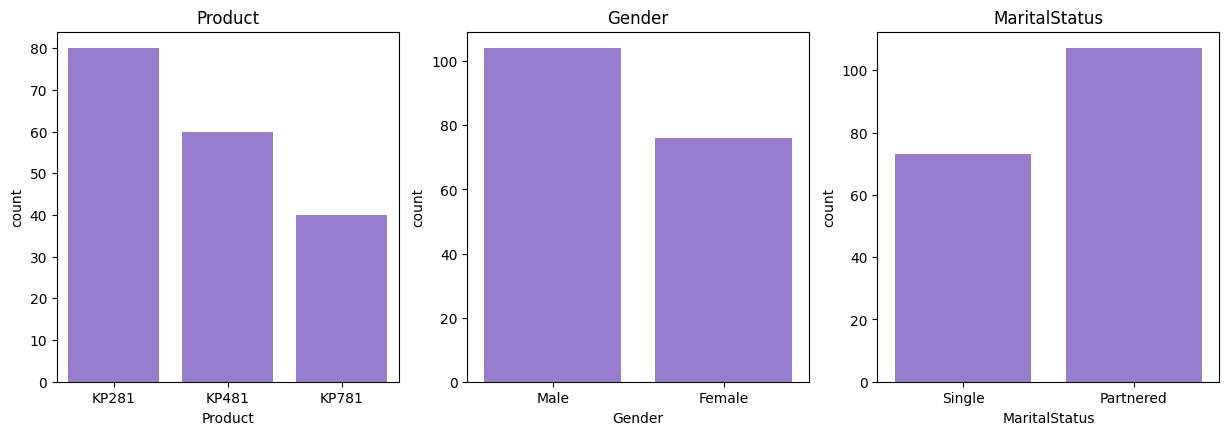

In [ ]:
#Analysis of string_type (categorical) columns.
num_cols = ["Product","Gender","MaritalStatus"]
plt.figure(figsize=(15, 10))

for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns grid
    sns.countplot(x=fit_df[col], color="mediumpurple")
    plt.title(col)

**Insights**:-
*   Most Popular Product: KP281 → should be promoted as the flagship product.
*   Demographic Tilt: More males and more partnered individuals buy Aerofit products.
*   Strategic Implication:
    *   Marketing should highlight family/partner fitness packages (since partnered customers dominate).
    *   Campaigns can also emphasize male-focused fitness goals, but there’s room to expand female customer engagement.
    *   Reassess KP781 — why is it least popular? Maybe too expensive, niche, or less value for money.


###Bivariate Analysis

In [ ]:
#from pickle import TRUE
crosstab_result=pd.crosstab(fit_df['Product'], fit_df['Gender'])
crosstab_result


Gender,Female,Male
Product,,
KP281,40,40
KP481,29,31
KP781,7,33


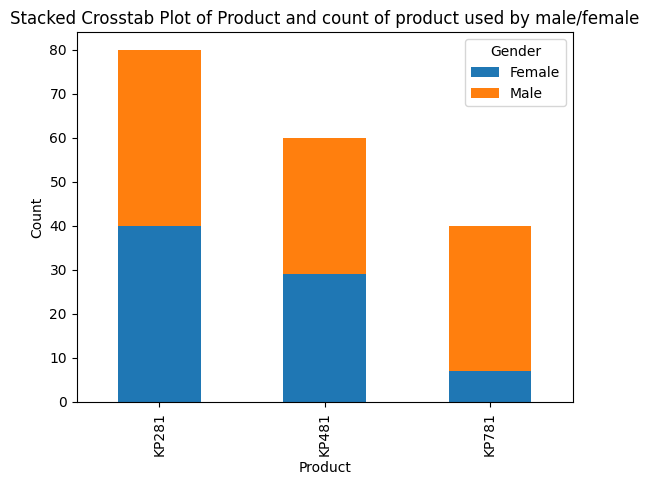

In [ ]:
crosstab_result.plot(kind='bar', stacked=True)
plt.title('Stacked Crosstab Plot of Product and count of product used by male/female')
plt.xlabel('Product')
plt.ylabel('Count')
plt.show()

**Insights** :-

*KP281* = Universal product (works well for both men and women).

*KP481* = Balanced but slightly male-leaning.

*KP781* = Male-dominated, minimal female adoption.

###Product-wise Analysis

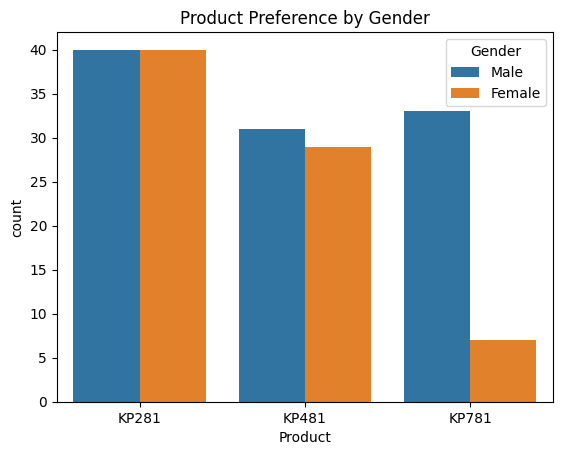

In [ ]:
#Gender vs Product
sns.countplot(data=fit_df, x='Product', hue='Gender')
plt.title('Product Preference by Gender')
plt.show()

**Insights**:- Both male and female prefers 'KP281' trademill, and very less female prefer 'KP781' trademill.

/tmp/ipython-input-4019263782.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=fit_df, x='Product', y='Age', palette='pastel')


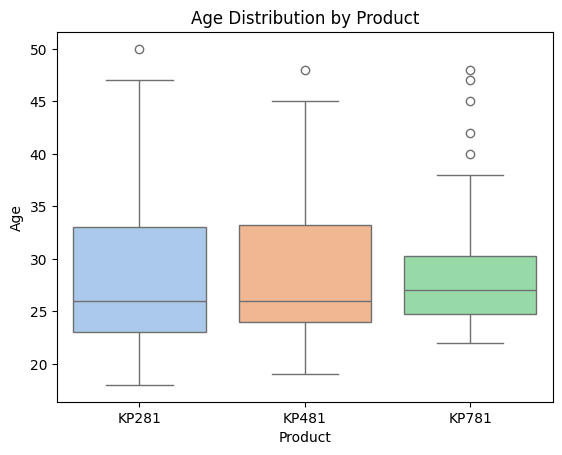

In [ ]:
#Age Distribution by Product
sns.boxplot(data=fit_df, x='Product', y='Age', palette='pastel')
plt.title('Age Distribution by Product')
plt.show()


**Insights** :-

*   KP781 has more older age outliers (above 40 years) compared to the other products, which suggests that although most KP781 buyers are similar in age to the others, a small group of older customers prefers KP781.


/tmp/ipython-input-3669345154.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=fit_df, x='Product', y='Income', palette='pastel')


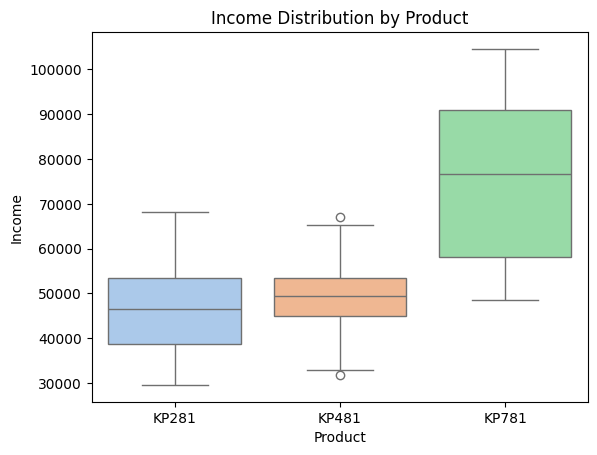

In [ ]:
#Income vs Product
sns.boxplot(data=fit_df, x='Product', y='Income', palette='pastel')
plt.title("Income Distribution by Product")
plt.show()

Insights:- High- income customers likely prefer KP781.

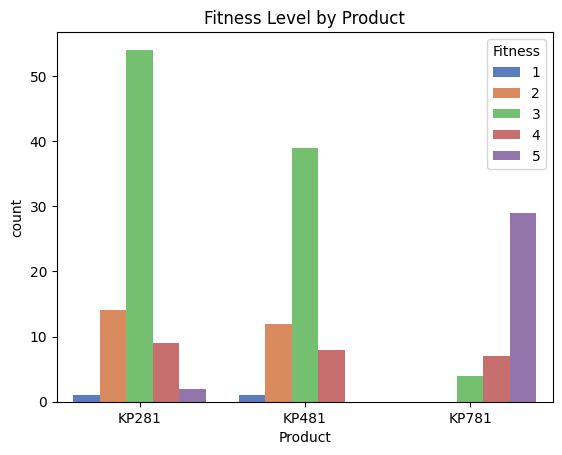

In [ ]:
#Fitness Level vs Product
sns.countplot(data=fit_df, x='Product', hue='Fitness', palette='muted')
plt.title('Fitness Level by Product')
plt.show()

**Insights**:-

*   KP281 and KP481 are most popular among customers with fitness level 3, which dominates both products by a large margin.
*   KP781 is preferred by customers with fitness level 5, making it the choice for highly fit individuals. It has almost no buyers in levels 1 or 2.

This means KP781 should be marketed as a premium/high-performance treadmill for advanced users, while KP281 and KP481 can target general fitness users.



#**Customer Profiling by Product**

In [7]:
# Group-wise average profile for each treadmill product
profile_summary = fit_df.groupby("Product").agg({
    "Age": "mean",
    "Income": "mean",
    "Education": "mean",
    "Usage": "mean",
    "Fitness": "mean",
    "Miles": "mean"
}).round(1)

profile_summary


,Age,Income,Education,Usage,Fitness,Miles
Product,,,,,,
KP281,28.6,46418.0,15.0,3.1,3.0,82.8
KP481,28.9,48973.6,15.1,3.1,2.9,87.9
KP781,29.1,75441.6,17.3,4.8,4.6,166.9


###KP281


*   Age: Mostly young to middle-aged (Median ~26)
*   Fitness Level: Dominantly Level 3 (moderate fitness)
*   Income: Lowest median (~45–47k) (moderate spread).
*   Gender: Even split male ≈ female.
*   Positioning: Everyday, versatile, budget‑friendly option for general fitness.

###KP481



*   Age: Mid‑20s median; moderate spread.
*   Fitness: Also centered at level 3, more level 4 than KP281.
*   Income: Mid-level median (~50k), slightly above KP281.
*   Gender: Near-balanced (slight male tilt).
*   Positioning: Step‑up model for progressing users seeking more features.


###KP781


*   Age: Slightly younger mid‑20s median, (tighter spread)
*   Fitness: Dominated by level 5 with notable level 4; minimal level 3; essentially no 1–2.
*   Income: Highest median (~75k+) with wide upper range (to ~105k).
*   Gender: Strong male skew (≈ 80% male).
*   Positioning: Flagship for serious/competitive users; performance-first.

###Conclusion (Lookalike audiences):



*   **KP281**: balanced gender, income 35–55k, broad interests.
*   **KP481**: fitness app users with intermediate routines.
*   **KP781**: male, high income, advanced training interests.

#**Probability**

###Contigency table

In [ ]:
#Contigency table to show the relationship between Product (Treadmill type) and Gender.
contingency_table=pd.crosstab(fit_df['Product'], fit_df['Gender'],margins_name='Total',margins=True)
contingency_table

Gender,Female,Male,Total
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
Total,76,104,180


###Marginal Probability

#####What is the probability that a randomly selected customer is Male?

In [ ]:
print(round(contingency_table.loc['Total','Male']/contingency_table.loc['Total','Total'],2))


0.58


#####What is the probability that a customer purchased KP281?

In [ ]:
print(round(contingency_table.loc['KP281','Total']/contingency_table.loc['Total','Total'],2))


0.44


#####What is the probability that a customer is Female?

In [ ]:
print(round(contingency_table.loc['Total','Female']/contingency_table.loc['Total','Total'],2))


0.42


#####What is the probability that a customer purchased KP781?

In [ ]:
print(round(contingency_table.loc['KP781','Total']/contingency_table.loc['Total','Total'],2))


0.22


#####Summary Table: Marginal Probabilities

In [6]:
# Marginal probabilities of products purchased
product_dist = fit_df['Product'].value_counts(normalize=True).rename("Probability")
product_summary = pd.DataFrame({
    "Count": fit_df['Product'].value_counts(),
    "Probability": product_dist.round(3)
})
product_summary


,Count,Probability
Product,,
KP281,80,0.444
KP481,60,0.333
KP781,40,0.222


**Insights**:-
*   The majority of customers are Male (57.8%) compared to Female (42.2%).
*   The most purchased product is KP281 (44.4%), while KP781 (22.2%) has the lowest share.
*   To improve KP781 sales, marketing efforts should be focused more on KP781.





###Joint Probability

#####What is the probability that a customer is Male and purchased KP481?

In [ ]:
print(round(contingency_table.loc['KP481','Male']/contingency_table.loc['Total','Total'],2))

0.17


#####What is the probability that a customer is Female and purchased KP281?

In [ ]:
print(round(contingency_table.loc['KP281','Female']/contingency_table.loc['Total','Total'],2))

0.22


**Insights**:

*   The probability that a randomly selected customer is Male and bought   KP481 is 17%.
    → KP481 is relatively popular among males but not the top choice.
*   The probability that a customer is Female and bought KP281 is 22%, which is higher than Male & KP481.
    → KP281 is the most preferred product among females compared to males buying KP481.
*   Comparing these two:
    Female + KP281 (22%) > Male + KP481 (17%)
    → KP281 has a stronger female customer base.
*   If we combine this with marginal probabilities:
    *   KP281 is overall the most purchased product.
    *   KP481 is the second most purchased, but still less dominant among males compared to KP281 among females.












**Business Insights**:-
*   KP281 is a strong product for female customers – maintain or increase targeted marketing for this segment.
*   KP481 performs moderately among male customers, so more promotion could increase its share.
*   KP781 (from earlier analysis) still has the least share overall → needs special marketing.




###Conditional Probability

#####What is the probability that a customer purchased KP481 given that the customer is Male?

In [ ]:
#What is the probability a male customer buys KP481?
print(round(contingency_table.loc['KP481','Male']/contingency_table.loc['Total','Male'],2))


0.3


#####What is the probability that a customer is Female given that they purchased KP781?

In [ ]:
print(round(contingency_table.loc['KP781','Female']/contingency_table.loc['KP781','Total'],2))

0.18


#####What is the probability that a customer purchased KP281 given that the customer is Female?

In [ ]:
print(round(contingency_table.loc['KP281','Female']/contingency_table.loc['Total','Female'],2))

0.53


**Insights:-**
1.   Among male customers, 30% purchased KP481
    → KP481 has moderate popularity among males (but not the most preferred since 40% of males bought KP281).
2.   Among customers who purchased KP781, only 18% are female
    → KP781 is strongly male-dominated (82% of KP781 buyers are male), so marketing for KP781 should focus on male customers.
3.   Among female customers, 53% purchased KP281
    → KP281 is the most popular product for females, making it a strong segment for female-focused marketing campaigns.









**Business Insights :-**

1.   KP281 is highly favored by female customers (53% of females buy it).
    → This indicates a strong female market for KP281. Continue focusing marketing efforts on KP281 for female customers and consider bundling or upselling strategies for this segment.
2.   KP481 is moderately preferred by male customers (30% of males buy it).
    → While KP481 has traction among males, it lags behind KP281. To increase its share, create targeted promotions for males who are not buying KP281.
3.   KP781 is primarily a male-dominated product (only 18% of its buyers are female).
    → Marketing for KP781 should focus on male customers, or consider repositioning KP781 to appeal more to females if the goal is to balance sales across genders.

###Others

#####Among customers who bought KP481, what is the probability distribution for gender?

In [ ]:
#probability of male customers ,given who bought KP481
print(round(contingency_table.loc['KP481','Male']/contingency_table.loc['KP481','Total'],2))

0.52


In [ ]:
#probability of female customers ,given who bought KP481
print(round(contingency_table.loc['KP481','Female']/contingency_table.loc['KP481','Total'],2))

0.48


**Insights**:-
*   The distribution is almost equal:

    Male: 51.7%

    Female: 48.3%
*   This means KP481 appeals equally to both genders, so marketing for KP481 should not be gender-specific—a balanced campaign is best.







#####If we randomly select a customer, what is the probability they are Male or purchased KP281? (Use union formula)

In [ ]:
#P(M U KP281)=P(M)+P(KP281)-P(M INT KP281)
total = contingency_table.loc['Total', 'Total']
p_union = ((contingency_table.loc['Total','Male'] + contingency_table.loc['KP281','Total']) - contingency_table.loc['KP281','Male']) / total
print(round(p_union, 2))


0.8


#####Which product has the highest conditional probability for Female customers?

In [ ]:
#probability of KP781 , given that customer is female
print(round(contingency_table.loc['KP781','Female']/contingency_table.loc['Total','Female'],2))

0.09


In [ ]:
#probability of KP781 , given that customer is female
print(round(contingency_table.loc['KP281','Female']/contingency_table.loc['Total','Female'],2))

0.53


In [ ]:
#probability of KP781 , given that customer is female
print(round(contingency_table.loc['KP481','Female']/contingency_table.loc['Total','Female'],2))

0.38


**Insights**:- Among all 3 products, KP781  has the highest conditional probability for female customers.

In [ ]:
fit_df.head(3)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66


#**Recommendations & Actionable Insights**

**KP281 (Entry-level model):**

Preferred by younger customers (20–30 years) and those with lower income levels.

Marketing Strategy: Target college students, first-time job seekers, and fitness beginners with affordable installment plans.

**KP481 (Mid-range model):**

Popular among married customers in the 30–40 age group with moderate income.

Marketing Strategy: Position as a family treadmill emphasizing durability and value.

**KP781 (Premium model):**

Strongly preferred by high-income customers (>₹70k/month), skewed towards males aged 35–50.

Marketing Strategy: Target with luxury branding, corporate wellness tie-ups, and personal trainer bundles.

**Customer Segmentation:**

Customers can be segmented into Budget Buyers, Value Seekers, and Premium Shoppers.

Each segment requires different messaging and sales channels.

**Future Opportunities:**

Consider subscription models (maintenance + virtual training).

Use probability-based recommendations to upsell (e.g., KP281 buyers with rising income → KP481).